In [1]:
# train a generative adversarial network on a one-dimensional function
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from matplotlib import pyplot
import requests

from bs4 import BeautifulSoup


In [2]:
file1 = open('cards-standard.txt', 'r') 
Lines = file1.readlines() 
maximum = len(Lines)
cards_key = {}
cards_value = {}
i=1
for line in Lines:
    cards_value[i] = line.rstrip("\n")
    cards_key[line.rstrip("\n")] = i
    i += 1

print(cards_key["Arcane Breath"])
print(cards_value[32])
print(len(Lines))

32
Arcane Breath
1254


In [3]:
deck_vector = [32,64,98,1000,1250,1,2,4,5,70,97,12,67,98,33,33,43,54,76,27,65,43,78,32,78,96,12,10,32,6]
print(len(deck_vector))

#no need to filter based of card class or legendaries etc.. because this is just for the conversion after the deck has been built. The actual filtering should be either done by the AI or previously done in the deckbuilding CSV

def deck_to_vector(deck):
    deck_vector = []
    for elem in deck:
        #remove any potential white spaces from strings
        #if type(deck) is not list:
        elem = elem.lstrip()
        deck_vector.append(cards_key[elem])
    return deck_vector

def vector_to_deck(deck_vector):
    deck = []
    for elem in deck_vector:
        deck.append(cards_value[elem])
    return deck

deck = vector_to_deck(deck_vector)
print(deck)

new_deck_vector = deck_to_vector(deck)
print(new_deck_vector)


30
['Arcane Breath', 'Demon Companion', 'Humility', 'Wrathspike Brute', 'Survival of the Fittest', 'Ancestral Healing', 'Backstab', 'Circle of Healing', 'Desk Imp', 'Double Jump', 'Hot Air Balloon', 'Lightning Bloom', 'Desperate Measures', 'Humility', 'Arcane Missiles', 'Arcane Missiles', 'Blessing of Might', 'Claw', 'Elemental Allies', 'Activate the Obelisk', 'Demonic Studies', 'Blessing of Might', 'Embalming Ritual', 'Arcane Breath', 'Embalming Ritual', 'Holy Smite', 'Lightning Bloom', 'Innervate', 'Arcane Breath', 'Embiggen']
[32, 64, 98, 1000, 1250, 1, 2, 4, 5, 70, 97, 12, 67, 98, 33, 33, 43, 54, 76, 27, 65, 43, 78, 32, 78, 96, 12, 10, 32, 6]


In [147]:
#scrape deck data from Hearthpwn website, standard decks
start_urls = []
for i in range(2):
    start_urls.append("https://www.hearthpwn.com/decks?filter-deck-tag=4&filter-show-constructed-only=y&filter-show-standard=1&page=" + str(i+1))
print(start_urls)
deck_urls = []
deck_classes = []
for url in start_urls:
    r = requests.get(url)
    soup = BeautifulSoup(r.content,"html.parser")
    #rows = soup.find(id="decks-container")
 
    rows = soup.find_all('table', class_="listing listing-decks b-table b-table-a")
    for row in rows:
        decks = row.find_all('span', class_="tip")
        for deck in decks:
            links = deck.find_all('a', href=True)
            for link in links:
                deck_urls.append("https://www.hearthpwn.com" + link['href'])
                
        deck_class = row.find_all('td', class_="col-class")
        for cl in deck_class:
            deck_classes.append(cl.text)

    
print(deck_urls[0])
print(len(deck_urls))
print(deck_classes)
print(len(deck_classes))


['https://www.hearthpwn.com/decks?filter-deck-tag=4&filter-show-constructed-only=y&filter-show-standard=1&page=1', 'https://www.hearthpwn.com/decks?filter-deck-tag=4&filter-show-constructed-only=y&filter-show-standard=1&page=2']
https://www.hearthpwn.com/decks/1372564-cthun-saron-control-68-wr-d5-legend
50
['Warrior', 'Shaman', 'Shaman', 'Warrior', 'Paladin', 'Hunter', 'Priest', 'Priest', 'Mage', 'Demon Hunter', 'Druid', 'Warlock', 'Priest', 'Priest', 'Paladin', 'Warlock', 'Rogue', 'Hunter', 'Hunter', 'Shaman', 'Shaman', 'Warlock', 'Rogue', 'Paladin', 'Warrior', 'Mage', 'Paladin', 'Shaman', 'Warrior', 'Rogue', 'Druid', 'Mage', 'Druid', 'Hunter', 'Mage', 'Priest', 'Demon Hunter', 'Druid', 'Priest', 'Mage', 'Warrior', 'Rogue', 'Rogue', 'Hunter', 'Shaman', 'Warrior', 'Priest', 'Shaman', 'Mage', 'Rogue']
50


In [183]:
#deck_array = [a + b for a,b in zip(deck_urls,deck_classes)]
#import numpy as np

#dl = np.asarray(deck_urls)
#dc = np.asarray(deck_classes)

#new_decks = np.hstack(zip(dl,dc))
#new_decks[1]

array = []
for i in range(len(deck_urls)):
    array.append([deck_urls[i],deck_classes[i]])
                  
print(array[0])
    

['https://www.hearthpwn.com/decks/1372564-cthun-saron-control-68-wr-d5-legend', 'Warrior']


In [184]:
#scrape cards in deck from separate url
decks = []
for url in deck_urls:
    deck=[]
    r = requests.get(url)
    soup = BeautifulSoup(r.content,"html.parser")
    table = soup.find_all('table', class_="listing listing-cards-tabular b-table b-table-a")
    for rows in table:
        row = rows.find_all('td', class_="col-name")
        for i in row:
            card = i.find('a')
            name = card.text
            number = card['data-count']
            
            for num in range(int(number)):
                deck.append(name.replace('\n',''))
    print(deck)
    print(len(deck))
    decks.append(deck)


        


['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Minefield', 'Minefield', 'Ancharrr', 'Bladestorm', 'Bladestorm', 'Bloodsworn Mercenary', 'Bulwark of Azzinoth', 'Coerce', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Lord Barov', 'Shield Block', 'Shield Block', 'Sword Eater', 'Sword Eater', 'Brawl', 'Brawl', 'Deathwing, Mad Aspect', 'Rattlegore', 'Kobold Stickyfinger', "C'Thun, the Shattered", 'Yogg-Saron, Master of Fate']
30
['Lightning Bloom', 'Lightning Bloom', 'Mutate', 'Mutate', 'Revolve', 'Revolve', 'Cagematch Custodian', 'Cagematch Custodian', 'Diligent Notetaker', 'Diligent Notetaker', 'Explosive Evolution', 'Bogstrok Clacker', 'Bogstrok Clacker', 'Instructor Fireheart', 'Pit Master', 'Pit Master', 'Serpentshrine Portal', 'Serpentshrine Portal', 'Bloodlust', 'Boggspine Knuckles', 'Boggspine Knuckles', 'Totem Goliath', 'Totem Goliath', 'Mogu Fleshshaper', 'Mogu Fleshshaper', 'Desert Hare', 'Desert Hare',

['Raise Dead', 'Raise Dead', 'Demonic Studies', 'Demonic Studies', 'Flame Imp', 'Flame Imp', 'Soulfire', 'Soulfire', 'Voidwalker', 'Voidwalker', 'Boneweb Egg', 'Expired Merchant', 'Expired Merchant', 'Felstalker', 'Felstalker', 'Kanrethad Ebonlocke', 'Free Admission', 'Free Admission', "Man'ari Mosher", "Man'ari Mosher", 'Fire Breather', 'Fire Breather', 'Nightshade Matron', 'Nightshade Matron', "Hand of Gul'dan", "Hand of Gul'dan", 'Ring Matron', 'Ring Matron', 'Frenzied Felwing', 'Frenzied Felwing']
30
['Preparation', 'Preparation', 'Shadowstep', 'Pharaoh Cat', 'Pharaoh Cat', 'Praise Galakrond!', 'Praise Galakrond!', 'Foxy Fraud', 'Foxy Fraud', 'Swindle', 'Swindle', 'Edwin VanCleef', 'EVIL Miscreant', 'EVIL Miscreant', 'Seal Fate', 'Seal Fate', 'Ticket Master', 'Ticket Master', 'Jandice Barov', 'Malevolent Strike', 'Malevolent Strike', 'Stowaway', 'Stowaway', 'Flik Skyshiv', 'Heistbaron Togwaggle', 'Galakrond, the Nightmare', 'Shield of Galakrond', 'Shield of Galakrond', 'Kronx Drago

['Elemental Allies', 'Elemental Allies', 'Lab Partner', 'Lab Partner', 'Primordial Studies', 'Primordial Studies', 'Violet Spellwing', 'Violet Spellwing', 'Wand Thief', 'Wand Thief', 'Confection Cyclone', 'Confection Cyclone', 'Frostbolt', 'Frostbolt', 'Arcane Amplifier', 'Arcane Amplifier', 'Arcane Intellect', 'Arcane Intellect', 'Combustion', 'Firebrand', 'Firebrand', 'Flame Ward', 'Fireball', 'Fireball', 'Water Elemental', 'Water Elemental', 'Grand Finale', 'Grand Finale', 'Gyreworm', 'Gyreworm']
30
['Lightning Bloom', 'Nature Studies', 'Nature Studies', 'Strength in Numbers', 'Strength in Numbers', 'Breath of Dreams', 'Breath of Dreams', 'Guess the Weight', 'Guess the Weight', 'Lunar Eclipse', 'Lunar Eclipse', 'Bogbeam', 'Wild Growth', 'Wild Growth', 'Overgrowth', 'Overgrowth', 'Emerald Explorer', 'Emerald Explorer', 'Winged Guardian', 'Winged Guardian', 'Fizzy Elemental', 'Fizzy Elemental', 'Sphere of Sapience', 'Circus Amalgam', 'Claw Machine', 'Claw Machine', 'Evasive Drakonid',

['Lightning Bloom', 'Lightning Bloom', 'Totemic Might', 'Totemic Might', 'Totemic Surge', 'Totemic Surge', 'Sludge Slurper', 'Sludge Slurper', "Storm's Wrath", "Storm's Wrath", 'Surging Tempest', 'Surging Tempest', 'Cagematch Custodian', 'EVIL Totem', 'EVIL Totem', 'Trick Totem', 'Trick Totem', "Grand Totem Eys'or", 'Mana Tide Totem', 'Mana Tide Totem', 'Totemic Reflection', 'Totemic Reflection', 'Splitting Axe', 'Splitting Axe', 'Bloodlust', 'Totem Goliath', 'Tour Guide', 'Tour Guide', 'Circus Amalgam', 'Circus Amalgam']
30
['Devolving Missiles', 'Magic Trick', 'Wand Thief', 'Ancient Mysteries', 'Apexis Smuggler', 'Arcane Flakmage', 'Game Master', 'Starscryer', 'Counterspell', 'Firebrand', 'Flame Ward', 'Ice Barrier', 'Kirin Tor Mage', 'Netherwind Portal', 'Rigged Faire Game', 'Spellbender', 'Occult Conjurer', 'Ring Toss', 'Cloud Prince', 'Jandice Barov', 'Reno the Relicologist', 'Sayge, Seer of Darkmoon', 'The Amazing Reno', 'Acidic Swamp Ooze', 'Wandmaker', 'Zephrys the Great', 'Inc

In [308]:
len(decks)

vecks = []
for d in decks:
    vecks.append(deck_to_vector(d))


[[153,
  153,
  164,
  226,
  226,
  230,
  230,
  250,
  348,
  348,
  460,
  472,
  472,
  477,
  487,
  497,
  522,
  522,
  593,
  652,
  652,
  841,
  841,
  891,
  891,
  1163,
  1226,
  940,
  1232,
  1254],
 [12,
  12,
  14,
  14,
  151,
  151,
  242,
  242,
  265,
  265,
  285,
  480,
  480,
  576,
  619,
  619,
  645,
  645,
  887,
  888,
  888,
  990,
  990,
  1220,
  1220,
  511,
  511,
  731,
  731,
  764],
 [12,
  12,
  68,
  113,
  113,
  171,
  171,
  183,
  183,
  242,
  242,
  383,
  383,
  576,
  586,
  586,
  645,
  645,
  664,
  664,
  732,
  732,
  845,
  845,
  903,
  911,
  911,
  938,
  441,
  441],
 [36,
  36,
  100,
  100,
  170,
  170,
  178,
  178,
  241,
  241,
  274,
  378,
  378,
  655,
  655,
  778,
  778,
  841,
  841,
  174,
  174,
  235,
  235,
  287,
  287,
  361,
  361,
  777,
  777,
  782],
 [7,
  7,
  29,
  29,
  224,
  303,
  303,
  328,
  328,
  351,
  556,
  556,
  717,
  717,
  761,
  780,
  780,
  869,
  869,
  885,
  885,
  942,
  942,
  10

In [7]:
def concatenate_deck_class(decks, classes):
    concatenated_result = []
    for i in range(len(decks)):
        concatenated_result.append([decks[i],classes[i]])
    return concatenated_result

   
collected_decks = concatenate_deck_class(decks, deck_classes)
collected_decks_vectored = concatenate_deck_class(vecks, deck_classes)

print(collected_decks)
#collected_decks = []
#collected_decks_vectored = []
#for i in range(len(decks)):
 #   collected_decks.append([decks[i],deck_classes[i]]) #replace with vecks[i] for vectors 
  #  collected_decks_vectored.append([vecks[i],deck_classes[i]]) #replace with vecks[i] for vectors 

    
#print(collected_decks)
    

NameError: name 'decks' is not defined

In [10]:
import numpy as np
import pandas as pd


pd.DataFrame(collected_decks, columns=['cards', 'class']).to_csv("collected_decks.csv",index=False)
pd.DataFrame(collected_decks_vectored, columns=['cards', 'class']).to_csv("collected_decks_vectored.csv",index=False)


#reads a csv of vectored decks and returns a list of decks converted from vector to text
def read_vector_decks(file):
    df = pd.read_csv(file)
    cards_from_csv = df['cards']
    converted_decks = []
    for cards in cards_from_csv:
        deck_to_convert = []
        cards = cards.strip("[]")
        cards = cards.split(", ")
        for card in cards:
            deck_to_convert.append(int(card))
        converted_decks.append(vector_to_deck(deck_to_convert))
    class_from_csv = df['class']
    final = concatenate_deck_class(converted_decks, class_from_csv)
    return final

deck_list = read_vector_decks("collected_decks_vectored_backup.csv")
print(deck_list[0])

#c = cards_from_csv[0].replace("[","") 
#c = c.replace("]","") 
#c = c.replace("'", "")
#print(deck_to_vector(c))
#c = c.strip('[]')
#c = c.split(", ")
#for i in cards_from_csv:
 #   print(deck_to_vector(i))
    

#new_df = deck_to_vector(df['cards'][0])

NameError: name 'collected_decks' is not defined

In [4]:
import numpy as np
import pandas as pd
def concatenate_deck_class(decks, classes):
    concatenated_result = []
    for i in range(len(decks)):
        concatenated_result.append([decks[i],classes[i]])
    return concatenated_result
def read_vector_decks(file):
    df = pd.read_csv(file)
    cards_from_csv = df['cards']
    converted_decks = []
    for cards in cards_from_csv:
        if len(deck) == 30: #len(cards)
            deck_to_convert = []
            cards = cards.strip("[]")
            cards = cards.split(", ")
            for card in cards:
                if card == '':
                    continue
                deck_to_convert.append(int(card))
            converted_decks.append(vector_to_deck(deck_to_convert)) #np.asarray
            class_from_csv = df['class']
            final = concatenate_deck_class(converted_decks, class_from_csv)
    return final
deck_list = read_vector_decks("collected_decks_vectored_Warrior.csv")


In [5]:
classes = ['Warrior', 'Mage', 'Hunter', 'Priest', 'Druid', 'Rogue', 'Shaman', 'Warlock', 'Paladin', 'Demon Hunter']

class_dictionary = {}

def filter_class(class_):
    filtered_decks = []
    for deck in deck_list:
        if len(deck[0]) == 30:
            if deck[1] == class_:
                filtered_decks.append(deck)
    return filtered_decks

for class_ in classes:
    class_dictionary[class_] = filter_class(class_)
    #print(filtered_decks)        

In [6]:
class_dictionary['Warrior'][2]

[['Risky Skipper',
  'Risky Skipper',
  'Shield Slam',
  'Shield Slam',
  'Armorsmith',
  'Armorsmith',
  'Battle Rage',
  'Battle Rage',
  'Ancharrr',
  'Bladestorm',
  'Bladestorm',
  'Bloodsworn Mercenary',
  'Bloodsworn Mercenary',
  'Bulwark of Azzinoth',
  'EVIL Quartermaster',
  'EVIL Quartermaster',
  'Lord Barov',
  'Shield Block',
  'Shield Block',
  'Kargath Bladefist',
  'Sword Eater',
  'Sword Eater',
  'Brawl',
  'Brawl',
  'Cutting Class',
  'Cutting Class',
  'Rattlegore',
  'Soulbound Ashtongue',
  'Kobold Stickyfinger',
  'Silas Darkmoon'],
 'Warrior']

Warrior: 1566
Mage: 0
Hunter: 0
Priest: 0
Druid: 0
Rogue: 0
Shaman: 0
Warlock: 0
Paladin: 0
Demon Hunter: 0


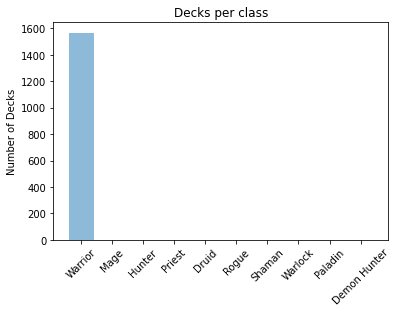

In [7]:
import numpy as np
import matplotlib.pyplot as plt

performance = []
#number of decks of each class
for class_ in classes:
    performance.append(len(class_dictionary[class_]))
    print(class_ + ": " + str(len(class_dictionary[class_])))


y_pos = np.arange(len(classes))
plt.bar(y_pos, performance, align="center", alpha=0.5)
plt.xticks(y_pos, classes, rotation = 45)
plt.ylabel('Number of Decks')
plt.title('Decks per class')
plt.show()

In [8]:
import random

def generate_fake_deck():
    deck = []
    for i in range(30):
        x = random.randint(1,maximum)
        deck.append(x)
    return deck

deck = generate_fake_deck()
deck = vector_to_deck(deck)
deck

['Strength in Numbers',
 'Gorehowl',
 'Conjured Mirage',
 'Enhanced Dreadlord',
 'Hailbringer',
 'Totem Goliath',
 'Chaos Gazer',
 'Galakrond, the Tempest',
 'Feast of Souls',
 'Brawl',
 'Mirror Entity',
 'Galakrond, the Nightmare',
 'Portal Keeper',
 'Plaguebringer',
 'Ancient Brewmaster',
 'Anubisath Warbringer',
 'Radiance',
 'Pit Master',
 'Thrallmar Farseer',
 'Dread Raven',
 'Parachute Brigand',
 'Galakrond, the Unbreakable',
 'Shadow Sculptor',
 'Raid the Sky Temple',
 'Nine Lives',
 "Mogu'shan Warden",
 'Crystal Stag',
 'Dark Iron Dwarf',
 'Silver Hand Knight',
 'Costumed Entertainer']

In [24]:

# define the standalone discriminator model
def define_discriminator(n_inputs=30):
    model = Sequential()
    model.add(Dense(30, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=30):
    model = Sequential()
    model.add(Dense(200, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
   # model.add(Dense(30, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(n_outputs, activation='linear')) #relu #linear
    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
    #model.compile(loss='mean_absolute_error', optimizer='Adam')

    return model



In [10]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model


In [11]:
#generate a fake deck function
#function that collects a sample of decks from dataset
#function that filters the dataset based on the class selected
#function that converts decks into vectors and back into decks
#function that links generated GAN deck into simulator

#Equivalent generate latent points function for decks?
#how would I generate "fake" decks from the generator? 
# - The generator usually takes a noise vector from the latent dimension. How would I do that in my problem? Do I need to create a sort of histogram function that "encapsulates" a deck and all the cards from every data row are added to it, then the chosen deck highlights the points on the chart
#how would I convert the decks into vectors to feed into the Network? 
# - Maybe by creating a collection of cards and associate a key to their name and use those keys to create a vector of shape[30]
#Feeding vectors of decks should work right? 
#which of the examples should I base myself off? Are they both correct?


#Generate a random vector of 30 random cards. 
#Input of the neural network would be 30

def generate_deck_samples(n, class_):
    samples = []
    #labels = []
    size = len(class_dictionary[class_])
    for i in range(n):
        if i > size:
            n = size
            break
        else:
            index = random.randint(0,size-1)
            #print(deck_to_vector(class_dictionary[class_][index][0]))
            samples.append(np.asarray(deck_to_vector(class_dictionary[class_][index][0]))) #!!!!
            
    labels = ones((len(samples), 1))        
    return np.asarray(samples), labels

real_X, real_Y = generate_deck_samples(5, 'Warrior')
print(real_X.shape)
print(real_Y.shape)


latent_space = []
for x in real_X:
    for y in x:
        latent_space.append(y)
#plt.plot(latent_space)

#rand_deck = []
#for i in range(30):
#    rand_deck.append(latent_space[random.randint(0,len(latent_space))])
#plt.plot(rand_deck)
    

#print(real_X[1])
#plt.plot(real_X[1])
#real_X = np.asarray(real_X)
print(vector_to_deck(real_X[1]))
print(type(real_X))
print(type(real_Y))

def generate_random_deck():
    deck = []
    for i in range(30):
        x = random.randint(1,maximum)
        deck.append(x)
    return deck
        
def generate_fake_decks(generator, n):
    fake_decks = []
    for i in range(n):
        fake_decks.append(generate_random_deck())
    fake_decks = np.asarray(fake_decks)
    X = generator.predict(fake_decks)
    y = zeros((n,1))
    return X, y

def generate_fake_sample(generator):
    fake_decks = []
    fake_decks.append(generate_random_deck())
    fake_decks = np.asarray(fake_decks)
    X = generator.predict(fake_decks)
    y = ones((1,1))
    return X, y


(5, 30)
(5, 1)
['Athletic Studies', 'Risky Skipper', 'Shield Slam', 'Sky Raider', 'Sword and Board', 'Whirlwind', 'Armorsmith', 'Execute', 'Slam', 'Bladestorm', 'Coerce', 'EVIL Quartermaster', 'Livewire Lance', 'Lord Barov', 'Playmaker', 'Ramming Speed', 'Shield Block', 'Kargath Bladefist', "Reaper's Scythe", 'Restless Mummy', 'Brawl', 'Plague of Wrath', 'Scrap Golem', 'Galakrond, the Unbreakable', 'Troublemaker', 'Zephrys the Great', 'Harrison Jones', 'Kronx Dragonhoof', 'Siamat', 'Dragonqueen Alexstrasza']
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
# evaluate the discriminator and plot real and fake points
def summarize_performance_gan(epoch, generator, discriminator, class_, n=1):
    # prepare real samples
    x_real, y_real = generate_deck_samples(n, class_)
    
    print(x_real)
   # print(y_real.shape)
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_decks(generator, n)
    print(x_fake)
   # print(y_fake.shape)
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print(epoch, acc_real, acc_fake)
    # scatter plot real and fake data points
    real = []
    fake = []
    for i in x_real:
        #pyplot.scatter(i[:], i[:], color='red')
        for d in i:
            real.append(d)
    for x in x_fake:
        #pyplot.scatter(x[:], x[:], color='blue')
        for d in x:
            fake.append(d)
    #real = np.asarray(real)
    #fake = np.asarray(fake)
    print(len(real))
    print(len(fake))
    real.sort()
    fake.sort()
    plt.plot(real, color='red')
    plt.plot(fake, color='blue')
    plt.show()

    #print(x_fake)
    #print(fake)
    #pyplot.scatter(x_real[:], x_real[:], color='red')
    #pyplot.scatter(x_fake[:], x_fake[:], color='blue')
    #pyplot.show()
    return x_fake


In [23]:
#modify this tooutput the same shape as x_fake
def fake_deck(real_X):
    latent_space = []
    for x in real_X:
        for y in x:
            latent_space.append(y)
    #plt.plot(latent_space)
    
    rand_deck = []
    for i in range(30):
        rand_deck.append(latent_space[random.randint(0,len(latent_space)-1)])
    rand_deck = np.asarray(rand_deck)
    X = generator.predict(rand_deck)
    return X
    

# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=1000, class_='Warrior', n=1000):
    # determine half the size of one batch, for updating the discriminator
    half_batch = int(n_batch / 2)
    gan_decks = []
    created_decks =[]
    # manually enumerate epochs
    for i in range(n_epochs):
        # prepare real samples
        x_real, y_real = generate_deck_samples(n, class_)
        
        #for x in x_real:
         #   print(len(x))
        #array=[]
        #for d in x_real:
         #   array.append(np.asarray(d))
       
        # prepare fake examples
        x_fake, y_fake = generate_fake_decks(g_model, n)
        
        #print(x_fake.shape)
        #print(y_fake.shape)
        # update discriminator
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        # prepare points in latent space as input for the generator
     
        x_gan, y_gan = generate_fake_sample(g_model)
        #print(x_gan)
        # create inverted labels for the fake samples
        #y_gan = ones((len(x_gan), 1))
        
        #print(x_gan.shape)
        #print(y_gan.shape)
        # update the generator via the discriminator's error
        gan_model.train_on_batch(x_gan, y_gan)
        # evaluate the model every n_eval epochs
        if (i+1) % n_eval == 0:
            created_decks.append(summarize_performance_gan(i, g_model, d_model, class_))
            print(created_deck)
            print(x_gan)
            gan_decks.append(x_gan)
    return created_decks, x_gan



[[ 199  199  305  305  540  540  549  549  694  694  778  778  793  793
   874  874   35   35  111  111  235  235  287  287  560  560  952  952
  1007 1007]]
[[ -73.196724  657.56494    34.854675  973.42834   324.01624   952.15845
   654.1989    361.18353  1116.717     573.10724  2216.878    1502.0582
  1449.8492   1867.0264   1065.5271   1598.9524    844.8522   2339.8242
  1359.9421   1516.2195   2093.5183   1518.1201    750.64734  2426.7393
  1861.099    1738.0127   1738.4423   1036.4467   1951.9615   3243.7297  ]]
999 0.0 1.0
30
30


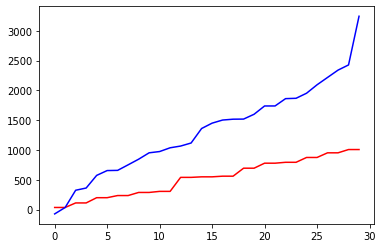

[[  2.954519   -1.7901102  66.68079    72.5063     56.119408   98.68389
  134.29996    58.16811   114.80498    43.137268   60.356026  107.89233
  170.87865   156.35999   182.50557   135.79161   119.87001   111.590996
  175.00648   149.06383   155.0593    180.13033   181.26982   115.80986
  271.82285   209.17763   183.07457   278.67932   241.60321   215.06854  ]]
[[ 185.24344 1137.5172    19.60266  545.6123   572.87787 1027.6953
   970.0587   849.7509  1201.31    1128.7377  1735.3456   668.49835
   974.88696 1089.6453  1013.7944  1298.2864  1038.307   2481.1807
  1045.943   2243.8657  2065.9087   855.33716 1248.1902  2499.6716
  2118.8704  1394.4862  1970.0702  1710.7172  1910.0648  3080.981  ]]
[[   9    9  153  153  165  165  206  206  226  226  230  230  375  375
   406  406  477  477  481  481  497  497  549  549  593 1198  132  132
   442  442]]
[[ -29.985723   208.68367    275.1619     196.40901    588.92615
   153.11154    471.9151     825.9704      -3.0441852  505.15485
  1112.8

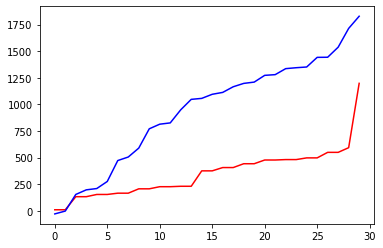

[[  2.954519   -1.7901102  66.68079    72.5063     56.119408   98.68389
  134.29996    58.16811   114.80498    43.137268   60.356026  107.89233
  170.87865   156.35999   182.50557   135.79161   119.87001   111.590996
  175.00648   149.06383   155.0593    180.13033   181.26982   115.80986
  271.82285   209.17763   183.07457   278.67932   241.60321   215.06854  ]]
[[ -51.912323  -77.47015   632.9993    579.0754    175.96117   248.80214
   591.16656   199.554     671.2101    381.06256   935.4539    937.6447
   801.34576   657.2074    741.0496    854.9526   1074.9924    431.06308
  1222.6931   1100.6049    403.9675   1036.417     688.5213   1181.3737
   700.2763    931.7364   1020.127    1174.878    1433.9711    938.45135 ]]
[[   9    9  100  100  164  164  226  226  254  254  295  295  481  481
   496  496  549  549  814  814  863  863 1097 1171  550  550  708  708
   883  883]]
[[ -23.337547  341.56842   167.89793   215.49646   -78.43847   396.2138
   306.15997   597.1468    146.71011   

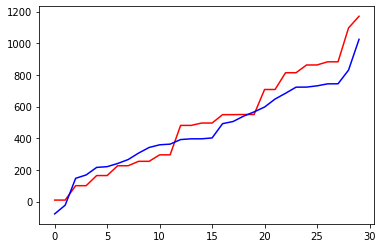

[[  2.954519   -1.7901102  66.68079    72.5063     56.119408   98.68389
  134.29996    58.16811   114.80498    43.137268   60.356026  107.89233
  170.87865   156.35999   182.50557   135.79161   119.87001   111.590996
  175.00648   149.06383   155.0593    180.13033   181.26982   115.80986
  271.82285   209.17763   183.07457   278.67932   241.60321   215.06854  ]]
[[  68.120865  525.874     180.02415    47.35619   217.12436   304.72528
   228.42647   866.2252    -56.79348   852.4579    946.08435  1064.2435
   852.9019    755.5068    625.3133    846.7789    486.2906   1208.8246
   474.00473  1092.5332   1425.0442    645.2477   1059.8589    456.3898
   685.88855  1478.8701   1385.9861    945.7749   1240.3008   1539.478   ]]
[[   9    9  153  153  165  170  170  226  226  230  230  250  250  375
   375  460  477  477  481  481  591  591  593  681  681  778  778 1098
  1098 1171]]
[[ 163.98631   252.55763   298.40744   252.7168    510.84872    47.520493
   239.87451   586.23065    26.431072 

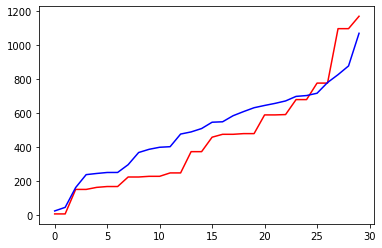

[[  2.954519   -1.7901102  66.68079    72.5063     56.119408   98.68389
  134.29996    58.16811   114.80498    43.137268   60.356026  107.89233
  170.87865   156.35999   182.50557   135.79161   119.87001   111.590996
  175.00648   149.06383   155.0593    180.13033   181.26982   115.80986
  271.82285   209.17763   183.07457   278.67932   241.60321   215.06854  ]]
[[-50.516148   99.44035   244.43675   214.93652   217.8133    -32.89858
  408.9837    282.10556     2.9760973 194.19211   775.2231    770.6125
  722.7003    389.35065   601.8496    560.8702    378.6671    314.00555
  507.36865   587.9823    546.7809    610.4905    569.21735   717.9907
  402.44833   765.42816   777.38873   525.16364   676.30945   962.38574  ]]
[[ 244  244  283  283  305  305  540  540  652  652  682  682  778  778
   874  874  213  213  233  233  358  358  651  651  711  711  750  750
  1014 1014]]
[[-162.74037    86.4811    -12.677594  163.27083   375.0637    207.20021
   414.27283   305.5712    127.39568   125

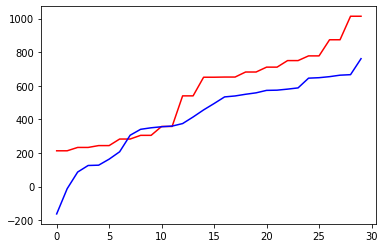

[[  2.954519   -1.7901102  66.68079    72.5063     56.119408   98.68389
  134.29996    58.16811   114.80498    43.137268   60.356026  107.89233
  170.87865   156.35999   182.50557   135.79161   119.87001   111.590996
  175.00648   149.06383   155.0593    180.13033   181.26982   115.80986
  271.82285   209.17763   183.07457   278.67932   241.60321   215.06854  ]]
[[-55.888977 -39.75849  415.5254   171.61789  180.8      236.85995
  326.69415  277.97992  360.87698  267.57367  491.53946  468.28397
  407.01706  379.94818  468.94437  469.35452  284.74362  344.16354
  582.2841   462.10147  302.4233   420.797    349.5154   648.5683
  712.5835   369.66537  465.9916   580.8229   506.34967  734.03864 ]]
[[ 36  36 170 170 199 199 250 250 305 305 460 591 591 621 621 772 904 904
  910 174 174 235 235 361 361 658 658 731 731 892]]
[[ 148.57675    15.523054  201.59366   319.4101    243.0102    330.64966
   440.92432    31.778702  368.0841    343.64667   251.57204   556.29395
   406.40472   318.5526   

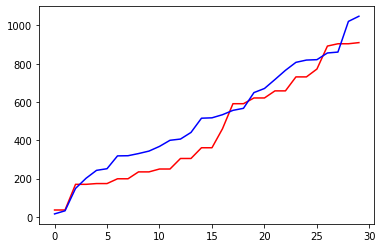

[[  2.954519   -1.7901102  66.68079    72.5063     56.119408   98.68389
  134.29996    58.16811   114.80498    43.137268   60.356026  107.89233
  170.87865   156.35999   182.50557   135.79161   119.87001   111.590996
  175.00648   149.06383   155.0593    180.13033   181.26982   115.80986
  271.82285   209.17763   183.07457   278.67932   241.60321   215.06854  ]]
[[  59.660458   39.940025  237.91792   291.79584   383.9335    253.99417
   333.39328   230.96262   380.07425   253.2275    585.9102    582.9112
   440.0399    636.71857   335.33408   664.4252    672.8826    476.29922
   731.59625   429.31448   599.8698    903.4033    541.65314   972.4202
   568.7417    858.93823   517.2572    975.4479    958.83057  1006.0015  ]]
[[ 164  164  206  226  226  254  254  283  283  487  652  652  772  778
   778  891  891  969  969 1098 1121 1171  332  332  750  750  934 1016
  1095 1228]]
[[123.74939  108.54047   22.151388 -14.766538 -22.919949 -19.581127
  350.70578  483.87985  317.67657  151.0882

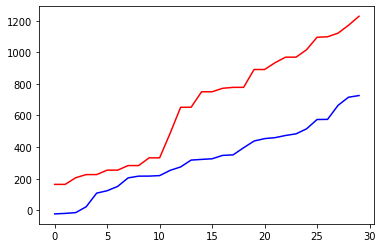

[[  2.954519   -1.7901102  66.68079    72.5063     56.119408   98.68389
  134.29996    58.16811   114.80498    43.137268   60.356026  107.89233
  170.87865   156.35999   182.50557   135.79161   119.87001   111.590996
  175.00648   149.06383   155.0593    180.13033   181.26982   115.80986
  271.82285   209.17763   183.07457   278.67932   241.60321   215.06854  ]]
[[249.85773   43.20292   10.936933  76.147545 426.12762  230.92247
  408.47858   34.59603  318.03528  169.34937  622.2524   299.73074
  395.43802  229.15685  241.62872  383.00092  325.7053   175.29567
  449.70615  286.564    439.70065  391.39795  434.89285  454.95612
  670.06775  568.0485   601.5879   517.03876  507.44876  557.1604  ]]
[[  36   36  164  170  170  184  184  199  250  469  469  522  522  652
   652  811  863  891  904 1117 1163 1198  550  577  722  722  764  972
   972 1048]]
[[  6.5923843 116.31818   160.24234    27.52902   185.48688    98.98504
  182.35933   169.86702    84.93426    91.31117   236.70125   109.7

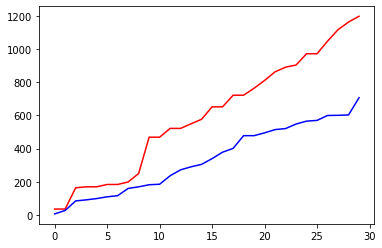

[[  2.954519   -1.7901102  66.68079    72.5063     56.119408   98.68389
  134.29996    58.16811   114.80498    43.137268   60.356026  107.89233
  170.87865   156.35999   182.50557   135.79161   119.87001   111.590996
  175.00648   149.06383   155.0593    180.13033   181.26982   115.80986
  271.82285   209.17763   183.07457   278.67932   241.60321   215.06854  ]]
[[270.84198   41.022373  17.49907   39.905876 109.131035 217.66763
  214.26822  242.66394  455.19003  384.29782  128.25081   65.396645
  179.42897  306.76727  454.2277   311.07983  575.6717   489.89905
  543.40045  505.4018   683.89667  608.96606  635.8078   635.5016
  593.8031   536.80316  627.01636  633.7281   764.8351   802.2994  ]]
[[ 164  164  184  184  199  199  206  206  250  250  472  472  497  593
   652  652  772  863  863  891  891  904  904  957 1097 1117 1163  213
   764 1048]]
[[121.48952 152.07112 135.36389 127.36231  63.36429 265.15314 396.26266
  379.93002 328.53128 523.2777  505.03665 495.1152  548.33185 443.4

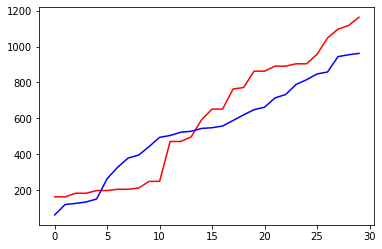

[[  2.954519   -1.7901102  66.68079    72.5063     56.119408   98.68389
  134.29996    58.16811   114.80498    43.137268   60.356026  107.89233
  170.87865   156.35999   182.50557   135.79161   119.87001   111.590996
  175.00648   149.06383   155.0593    180.13033   181.26982   115.80986
  271.82285   209.17763   183.07457   278.67932   241.60321   215.06854  ]]
[[135.9862   114.93059   48.498703 200.10861  149.43459  175.67345
  269.28387  139.21428  286.25293  466.95023  232.09677  212.66296
  344.2581   364.02924  333.59192  559.82794  464.95584  512.2759
  445.64267  677.5888   516.7079   603.7899   575.6131   704.2089
  605.756    575.1401   582.75464  499.81934  565.5675   803.8112  ]]
[[  93  100  164  199  206  250  283  295  406  460  522  591  652  727
   772  792  800  874  891  969 1009  453  764  829  883  892  919  934
  1046 1213]]
[[ 50.899364  46.63808   84.5704   273.33054  155.87526  110.71186
  117.42945  126.13396  237.08853  229.05074  293.59457  369.68893
  230.5

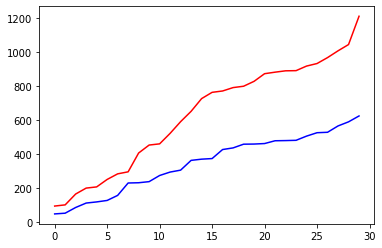

[[  2.954519   -1.7901102  66.68079    72.5063     56.119408   98.68389
  134.29996    58.16811   114.80498    43.137268   60.356026  107.89233
  170.87865   156.35999   182.50557   135.79161   119.87001   111.590996
  175.00648   149.06383   155.0593    180.13033   181.26982   115.80986
  271.82285   209.17763   183.07457   278.67932   241.60321   215.06854  ]]
[[ 46.328083 136.46123  162.65787  277.31555  133.94534  192.45917
  387.43887  299.3148   467.24808  396.6731   438.4876   313.03073
   65.53065  476.15317  471.94336  374.19818  481.8192   368.3082
  489.12576  433.358    357.46494  351.53046  361.7122   473.80328
  232.20892  459.81546  392.9947   790.50586  706.68414  504.83902 ]]


In [25]:
#Try doing the summarize function with a single generated deck rather than creating one every 1000 epochs
#Get and separate all class cards
#Try using a new graph type (scatter plot)
#try batch training
#try generating fake Warrior decks

latent_dim =30
# create the discriminator

#try changing activations n such on models
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
created_deck, gan_deck = train(generator, discriminator, gan_model, latent_dim)


In [17]:
result = []
for deck in created_deck:
    for card in range(len(deck)):
        deck[card] = abs(round(deck[card]))
    #result.append(vector_to_deck(deck))
result = vector_to_deck(created_deck[3])
print(result)

IndexError: index 3 is out of bounds for axis 0 with size 1

In [17]:
print(gan_deck)
final_decks = []
for deck in gan_deck:
    deck = []
    for card in deck:
        if abs(card) <= maximum:
            deck.append(abs(card))
        else:
            break
    if(len(deck) == 30):
        final_decks.append(deck)
            
            
            

[[ 33.564938  96.481    132.43692  119.76193   66.17291  105.80107
  215.61578  179.9031   204.62813  106.613144 277.29208  355.7967
  311.3197   276.4749   129.67683  326.4868    96.011536 241.02429
  152.95045   68.74708   67.6303   205.95436  354.56836  261.7127
  289.39777  303.71097  374.02585  230.91919  274.92322  272.96643 ]]


In [22]:
d = []
for cards in gan_deck[0]:
    if abs(cards) <= maximum and abs(cards) > 0:
        d.append(round(abs(cards)))
f = vector_to_deck(d)
print(f)
print(len(f))

d = []
for cards in created_deck[0]:
    if abs(cards) <= maximum and abs(cards) > 0:
        d.append(round((cards)))
f = vector_to_deck(d)
print(f)
print(len(f))

['Arcane Shot', 'Holy Smite', 'Pen Flinger', 'Mogu Cultist', 'Depth Charge', 'Into the Fray', 'Ambush', "Storm's Wrath", 'Wave of Apathy', 'Intrepid Initiate', 'EVIL Genius', 'Nether Breath', 'Immolation Aura', 'EVIL Conscripter', 'Overwhelm', 'Kobold Sandtrooper', 'Holy Smite', 'Bumper Car', 'Risky Skipper', 'Disciple of Galakrond', 'Devolving Missiles', 'Whirlwind', 'Neferset Ritualist', 'Deck of Lunacy', 'Felstalker', 'Hench-Clan Hogsteed', 'Quicksand Elemental', 'Betrayal', 'EVIL Cable Rat', 'Dwarven Archaeologist']
30


KeyError: -2.0